In [1]:
# Bibliotecas Utilizadas
import os
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import L2
import scipy

import warnings
warnings.filterwarnings('ignore')

2023-11-14 14:27:28.381905: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 14:27:28.582759: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 14:27:28.582806: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 14:27:28.584293: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 14:27:28.696925: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 14:27:28.697590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Carregando as imagens em variavéis
cats = [img for img in os.listdir('bases/train/cats')]
dogs = [img for img in os.listdir('bases/train/dogs')]

In [3]:
# Verificando o tamanho das bases
len(cats), len(dogs)

(12500, 12500)

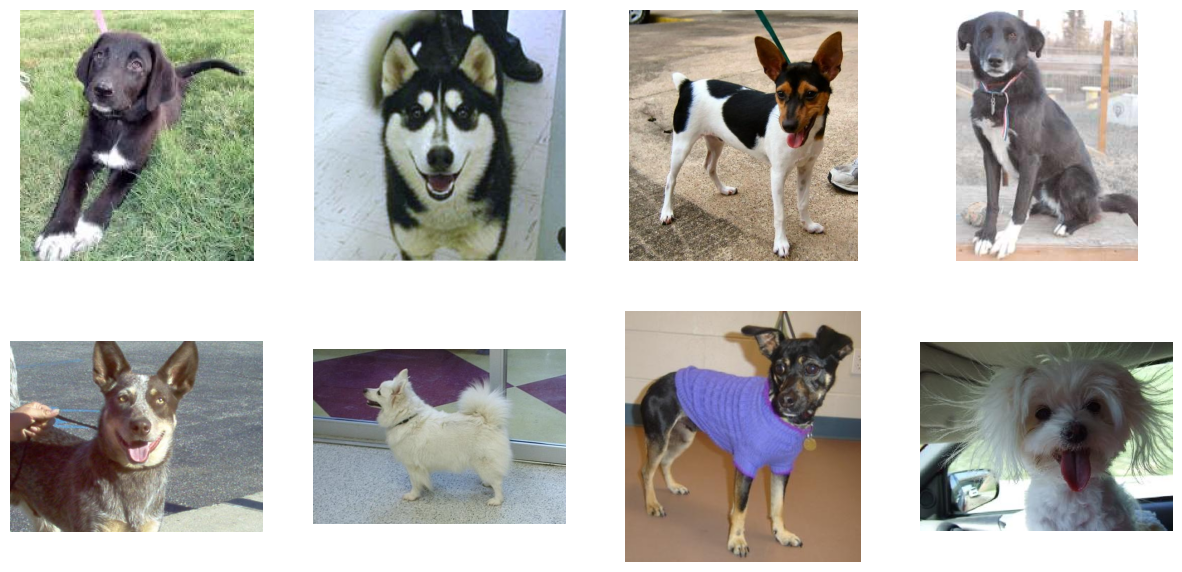

In [4]:
# Plotando algumas imagens de cachorros/gatos
plt.figure(figsize=(15, 15))

images = os.listdir('bases/train/dogs')

for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4, 4, i + 1)
    fig.axis('off')
    img = mpimg.imread(os.path.join('bases/train/dogs', img))
    fig.imshow(img)

In [5]:
# Preparando os dados para o modelo (preprocessamento)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'bases/train'
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_dir = 'bases/validation'
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 24998 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [6]:
# Verificando os indices de cada base
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [7]:
print(validation_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [8]:
# Estrutura do modelo
modelo =  Sequential()

modelo.add(Conv2D(128 , (3,3) ,activation = 'relu' , input_shape = (150,150,3)))
modelo.add(MaxPooling2D(pool_size=(4,4)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64 , (3,3) ,activation = 'relu'))
modelo.add(MaxPooling2D(pool_size=(4,4)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(128 , activation = 'relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(1, activation='sigmoid'))


modelo.compile(optimizer='adam' ,  loss = 'binary_crossentropy' , metrics = ['accuracy'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 37, 37, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [ ]:
# Processo para verificar se existe imagem corrompida

for i in range(len(train_generator.filenames)):
    try:
        img = mpimg.imread(os.path.join(train_dir, train_generator.filenames[i]))
    except:
        print(f'A imagem:{train_generator.filenames[i]} está corrompida')

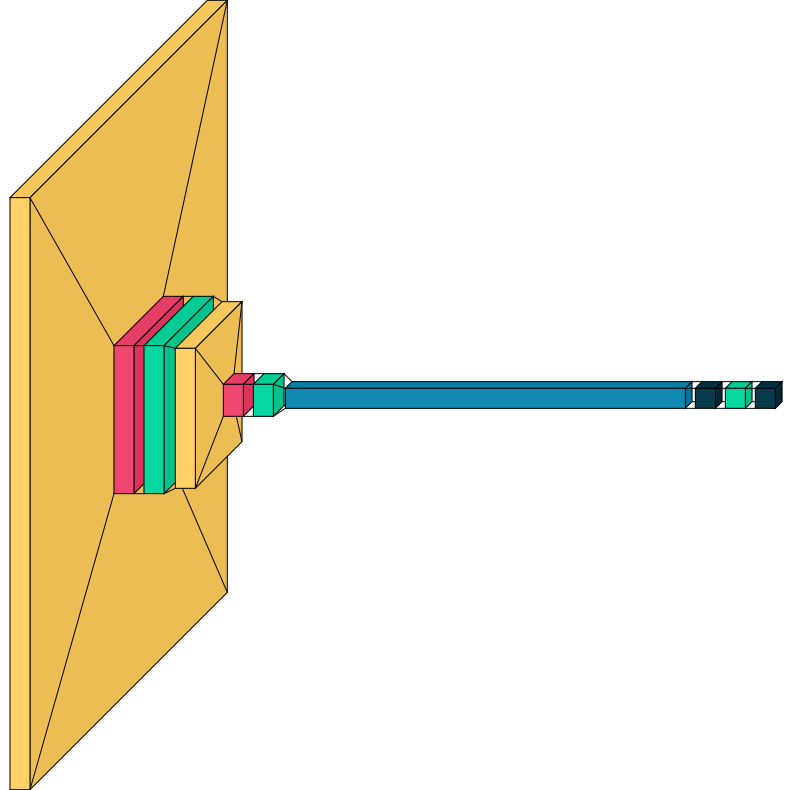

In [9]:
# Visualizando a arquitetura do modelo
import visualkeras

visualkeras.layered_view(modelo) 

In [11]:
# Efetuando o treinamento do modelo
try:
    history = modelo.fit(train_generator, epochs=10 , verbose =1 , validation_data=validation_generator)
except ValueError as e:
    print(f"error: {e}")

Epoch 1/10
782/782 [==============================] - 507s 649ms/step - loss: 0.6752 - accuracy: 0.5707 - val_loss: 0.6237 - val_accuracy: 0.6487
Epoch 2/10
782/782 [==============================] - 512s 654ms/step - loss: 0.6231 - accuracy: 0.6484 - val_loss: 0.5193 - val_accuracy: 0.7573
Epoch 3/10
782/782 [==============================] - 515s 659ms/step - loss: 0.5793 - accuracy: 0.6960 - val_loss: 0.5096 - val_accuracy: 0.7313
Epoch 4/10
782/782 [==============================] - 515s 659ms/step - loss: 0.5576 - accuracy: 0.7119 - val_loss: 0.4814 - val_accuracy: 0.7653
Epoch 5/10
782/782 [==============================] - 516s 660ms/step - loss: 0.5404 - accuracy: 0.7275 - val_loss: 0.4539 - val_accuracy: 0.7800
Epoch 6/10
782/782 [==============================] - 517s 662ms/step - loss: 0.5285 - accuracy: 0.7315 - val_loss: 0.4569 - val_accuracy: 0.7857
Epoch 7/10
782/782 [==============================] - 519s 663ms/step - loss: 0.5209 - accuracy: 0.7394 - val_loss: 0.4988 -

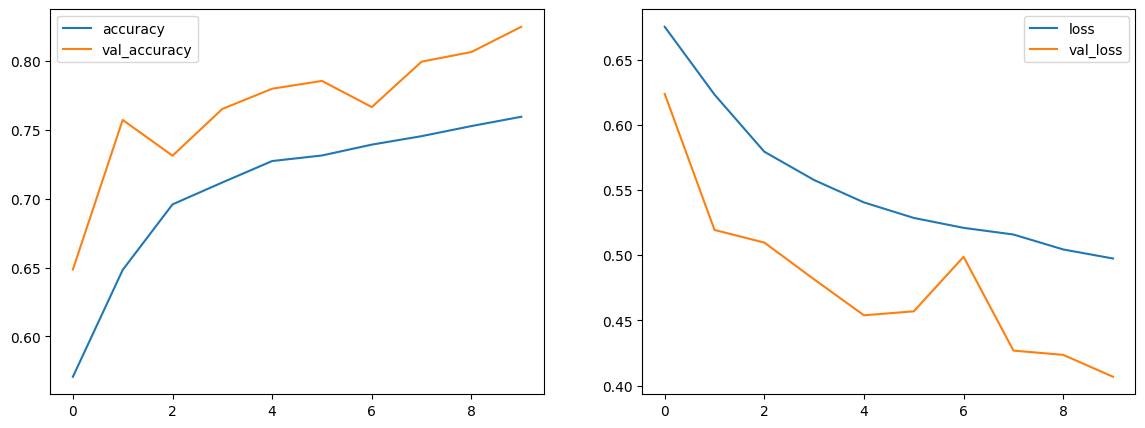

In [12]:
# Analisando os resultados de treinamento e validação
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='accuracy')
plt.plot(history_df['val_accuracy'], label='val_accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()

plt.show()